In [4]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import erf

import matplotlib.pyplot as plt

In [5]:
# 25 steps in z as well
p0 = [72.2, 71.7, 70.0, 65.7, 55.0, 35.3, 15.5, 4.7, 1.4, 0.4, 0.1, 0.1]
p1 = [72.0, 72.0, 72.0, 72.0, 72.0, 71.0, 64.3, 35.1, 5.8, 0.6, 0.1, 0.1]
p2 = [72.0, 71.8, 71.8, 3.9, 0.5, 0.3, 0.1, 0.1] # 25 steps
p2_10 = [71.8, 71.8, 71.8, 71.7, 71.7, 71.7, 71.6, 48.9, 0.8, 0.6, 0.5, 0.4, 0.3, 0.2, 0,2, 0.1, 0.1, 0,1, 0.1, 0.0]  # same as above but 10 steps
p3 = [71.9, 71.9, 71.9, 70.1, 57.1, 25.6, 6.2, 1,4, 0,2, 0.1, 0.1, 0.0]
p4 = [72.1, 71.6, 69.5, 63.6, 49.8, 30.8, 15.0, 6.4, 2.6, 0.8, 0.2, 0.1, 0.1, 0.1, 0.1]

In [6]:
def direction(power):
    return (np.sign(power[0] - power[-1]))

def model(y, alpha, w, y0, bg, direction):
    return (1/4.) * np.pi * alpha * w * w * (direction * erf(np.sqrt(2)*(y-y0)/w) + 1) + bg

In [7]:
def fit_beam_size(step, power, guess=[80/np.pi, 0.7, 2e-5, 0]):
    _direction = direction(power)
    power = np.asarray(power)
    
    # Positions of each measurement
    y = -1 * np.arange(power.size) * step
    popt, pcov = curve_fit(lambda y, alpha, w, y0, bg: model(y, alpha, w, y0, bg, _direction)
                           , y, power, p0=guess, maxfev=5000)

    # `alpha`: normalized total power,
    # `w`: beam size,
    # `y0`: beam center,
    # `bg`: background
    return popt

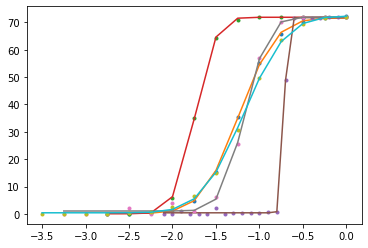

In [13]:
waist = []
step = [0.25, 0.25, 0.1, 0.25, 0.25]
for i, p in enumerate([p0, p1, p2_10, p3, p4]):
    s = step[i]
    alpha, w, y0, bg = fit_beam_size(s, p)
    waist.append(w)
    
    # Plotting
    y = -1 * np.arange(len(p)) * s
    plt.plot(y, p, '.')
    plt.plot(y, model(y, alpha, w, y0, bg, direction(p)))

[0.6735764250643121, 0.3789202504395181, 0.06658695529478836, 0.4280887538046712, 0.7705980967671736]


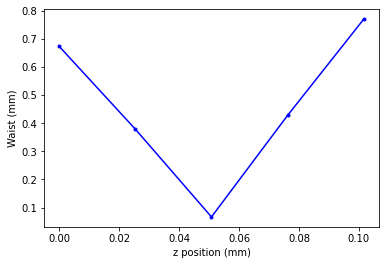

In [17]:
zstep = 0.0254
plt.plot(zstep*np.arange(len(waist)), waist, 'b.-')
plt.xlabel('z position (mm)')
plt.ylabel('Waist (mm)')
print(waist)